#  This is a shared notebook for Project I - Group 3

## Data Cleaning

In [85]:
#Dependencies
import os
import pandas as pd
import calendar
import glob
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
#from tabulate import tabulate
#import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#from pyvttbl import DataFrame
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import statsmodels.api as sm
from scipy.stats import levene
from scipy.stats import bartlett
from scipy.stats import linregress
import pingouin as pg
from functools import reduce
from pingouin import kruskal, read_dataset

In [2]:
#csvDir = os.path.join("Resources")
#col_list = ["month_of_death","day_of_week_of_death","current_data_year",
#                              "manner_of_death","358_cause_recode","sex","detail_age"]
#masterDf = pd.DataFrame()
#files = os.listdir(csvDir)
#for file in files:
#    if file.endswith(".csv"):
#        curCsv = os.path.join(csvDir,file)
#        with open(curCsv) as file:
#            x = pd.read_csv(file, usecols=col_list)
#            masterDf = pd.concat([masterDf,x],axis=0)

In [3]:
path = '/Users/bmacgreg/Documents/Bootcamp/Project_1/Project-1Team3/bundle_archive'
col_list = ["month_of_death","day_of_week_of_death","current_data_year",
                              "manner_of_death","358_cause_recode","sex","detail_age"]
masterDf = pd.DataFrame()
files = glob.glob(path + "/20*.csv")
for file in files:
    x = pd.read_csv(file, usecols=col_list)
    masterDf = pd.concat([masterDf,x],axis=0)
masterDf.sort_values(by=['current_data_year'])
masterDf

,month_of_death,sex,detail_age,day_of_week_of_death,current_data_year,manner_of_death,358_cause_recode
0,1,F,68,6,2010,7.0,187
1,1,F,12,1,2010,7.0,94
2,1,F,75,1,2010,7.0,122
3,1,M,61,6,2010,7.0,175
4,1,F,46,7,2010,2.0,429
...,...,...,...,...,...,...,...
2547859,9,M,60,6,2012,7.0,52
2547860,12,M,74,2,2012,7.0,159
2547861,11,M,71,6,2012,7.0,93
2547862,10,M,62,3,2012,1.0,418


In [4]:
#Filter to only deaths related to cars
car_death_data = masterDf[(masterDf["358_cause_recode"] >=385) & (masterDf["358_cause_recode"] <=398)]
car_death_data

,month_of_death,sex,detail_age,day_of_week_of_death,current_data_year,manner_of_death,358_cause_recode
98,1,M,76,5,2010,1.0,397
108,1,M,19,6,2010,1.0,396
204,1,M,58,1,2010,1.0,397
223,2,M,43,2,2010,1.0,397
279,1,M,55,7,2010,1.0,397
...,...,...,...,...,...,...,...
2547415,12,M,11,6,2012,1.0,397
2547466,12,M,47,7,2012,1.0,393
2547503,12,M,21,7,2012,1.0,397
2547682,12,F,25,1,2012,1.0,395


In [5]:
#Clean up the dataframe so that it is readable
month_dict = {
      1:"January",
      2:"February",
      3:"March",
      4:"April",
      5:"May",
      6:"June",
      7:"July",
      8:"August",
      9:"September",
      10:"October",
      11:"November",
      12:"December"}
      
day_of_week_dict = {
      1:"Sunday",
      2:"Monday",
      3:"Tuesday",
      4:"Wednesday",
      5:"Thursday",
      6:"Friday",
      7:"Saturday",
      9:"Unknown"}

manner_of_death_dict = {
      1:"Accident",
      2:"Suicide",
      3:"Homicide",
      4:"Pending investigation",
      5:"Could not determine",
      6:"Self-Inflicted",
      7:"Natural"}
#       "Blank":"Not specified"}

cause_recode_dict = {
      385:" 385- Motor vehicle accidents",
      386:" 386- Pedestrian involved in collision with motor vehicle",
      387:" 387- Pedalcyclist involved in collision with motor vehicle",
      388:" 388- Motorcyclist involved in any accident except collision with railway train",
      389:" 389- Motor vehicle accident involving collision with railway train",
      390:" 390- Motorcyclist involved in collision with railway train",
      391:" 391- Other motor vehicle accident involving collision with railway train",
      392:" 392- Occupant of motor vehicle involved in collision with other (non- motorized) road vehicle, streetcar, animal or pedestrian",
      393:" 393- Occupant of car, pickup truck or van involved in collision with other motor vehicle",
      394:" 394- Occupant of heavy transport vehicle or bus involved in collision with other motor vehicle",
      395:" 395- Occupant of motor vehicle involved in non-collision accident",
      396:" 396- Occupant of special-use motor vehicle involved in any accident",
      397:" 397- Other and unspecified motor vehicle accidents",
      398:" 398- Streetcar accidents"}
    

clean_df = car_death_data.replace({"month_of_death": month_dict, 
                        "day_of_week_of_death": day_of_week_dict,
                        "manner_of_death": manner_of_death_dict,
                        "358_cause_recode": cause_recode_dict})

clean_df

,month_of_death,sex,detail_age,day_of_week_of_death,current_data_year,manner_of_death,358_cause_recode
98,January,M,76,Thursday,2010,Accident,397- Other and unspecified motor vehicle acci...
108,January,M,19,Friday,2010,Accident,396- Occupant of special-use motor vehicle in...
204,January,M,58,Sunday,2010,Accident,397- Other and unspecified motor vehicle acci...
223,February,M,43,Monday,2010,Accident,397- Other and unspecified motor vehicle acci...
279,January,M,55,Saturday,2010,Accident,397- Other and unspecified motor vehicle acci...
...,...,...,...,...,...,...,...
2547415,December,M,11,Friday,2012,Accident,397- Other and unspecified motor vehicle acci...
2547466,December,M,47,Saturday,2012,Accident,"393- Occupant of car, pickup truck or van inv..."
2547503,December,M,21,Saturday,2012,Accident,397- Other and unspecified motor vehicle acci...
2547682,December,F,25,Sunday,2012,Accident,395- Occupant of motor vehicle involved in no...


In [6]:
#  check quality of data
#  list all unique values in each columns

colNames = list(clean_df.columns)
for col in colNames:
    print(col)
    print(f"{clean_df[col].unique()}")
    print("----------")

month_of_death
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
----------
sex
['M' 'F']
----------
detail_age
[ 76  19  58  43  55  40  21  56  14  16  70  39  42  54  68  18  72  25
  29  20  60  17  63  37  31  51  85  24  59  57  47  71  84   6  10  53
   8  64  28  89  62  66  22  26  38  46  15  75  49  88  36  65  83  73
  44  50  34  30   1  27  23  33  41  77  11   9  45  80  61  78  32   2
   4  79  67  86   7  91  87  48  81  90  35  52  74  69  97   3  82   5
  96  94  13  93 101  92  95  98  12 999  99 100 104 103 106 102 107]
----------
day_of_week_of_death
['Thursday' 'Friday' 'Sunday' 'Monday' 'Saturday' 'Tuesday' 'Wednesday'
 'Unknown']
----------
current_data_year
[2010 2011 2007 2006 2014 2015 2009 2008 2005 2013 2012]
----------
manner_of_death
['Accident' 'Natural' nan 'Homicide' 'Could not determine' 'Suicide'
 'Pending investigation']
----------
358_cause_recode
[' 397- Other and unspecified motor ve

In [7]:
#  Clean up
#  Remove not logical data 
# ie: age of 999, day of week : Unknown, manner_of_death nan, need filter by Accident
finalDf = clean_df[clean_df["detail_age"] != 999]
finalDf = finalDf[finalDf["manner_of_death"] == "Accident"]
finalDf = finalDf[finalDf["day_of_week_of_death"] != "Unknown"]
finalDf.sort_values(by='current_data_year', ascending=False)
finalDf

,month_of_death,sex,detail_age,day_of_week_of_death,current_data_year,manner_of_death,358_cause_recode
98,January,M,76,Thursday,2010,Accident,397- Other and unspecified motor vehicle acci...
108,January,M,19,Friday,2010,Accident,396- Occupant of special-use motor vehicle in...
204,January,M,58,Sunday,2010,Accident,397- Other and unspecified motor vehicle acci...
223,February,M,43,Monday,2010,Accident,397- Other and unspecified motor vehicle acci...
279,January,M,55,Saturday,2010,Accident,397- Other and unspecified motor vehicle acci...
...,...,...,...,...,...,...,...
2547415,December,M,11,Friday,2012,Accident,397- Other and unspecified motor vehicle acci...
2547466,December,M,47,Saturday,2012,Accident,"393- Occupant of car, pickup truck or van inv..."
2547503,December,M,21,Saturday,2012,Accident,397- Other and unspecified motor vehicle acci...
2547682,December,F,25,Sunday,2012,Accident,395- Occupant of motor vehicle involved in no...


In [8]:
# Enforcing order of day of week and months
finalDf['day_of_week_of_death'] = pd.Categorical(finalDf['day_of_week_of_death'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],ordered=True)
finalDf["month_of_death"] =  pd.Categorical(finalDf['month_of_death'], categories=
    ["January","February","March","April","May","June","July","August","September","October","November","December"],ordered=True)

In [9]:
finalDf.dtypes

month_of_death          category
sex                       object
detail_age                 int64
day_of_week_of_death    category
current_data_year          int64
manner_of_death           object
358_cause_recode          object
dtype: object

## Analysis

In [10]:
finalDf.dtypes

month_of_death          category
sex                       object
detail_age                 int64
day_of_week_of_death    category
current_data_year          int64
manner_of_death           object
358_cause_recode          object
dtype: object

In [11]:
census_summary_df = pd.read_csv("nc-est2019-agesex_rearranged.csv")
census_summary_df = census_summary_df.rename(columns={'Age group': 'Age_group', 'Both sexes': 'Both_sexes', 'Year':'current_data_year'})
census_summary_df

,Age_group,Age,current_data_year,Both_sexes,Male,Female
0,1,Under 5 years,2010,20188815,10312617,9876198
1,1,Under 5 years,2011,20123103,10279719,9843384
2,1,Under 5 years,2012,19976065,10204340,9771725
3,1,Under 5 years,2013,19849215,10141578,9707637
4,1,Under 5 years,2014,19872349,10159548,9712801
...,...,...,...,...,...,...
175,18,85 years and over,2015,6261880,2169359,4092521
176,18,85 years and over,2016,6381541,2234144,4147397
177,18,85 years and over,2017,6467173,2286700,4180473
178,18,85 years and over,2018,6544300,2334553,4209747


In [12]:
def label_age_group (row):
    if row['detail_age'] < 5 :
        return '1'
    elif row['detail_age'] < 10 :
        return '2'
    elif row['detail_age'] < 15 :
        return '3'
    elif row['detail_age'] < 20 :
        return '4'
    elif row['detail_age'] < 25 :
        return '5'
    elif row['detail_age'] < 30 :
        return '6'
    elif row['detail_age'] < 35 :
        return '7'
    elif row['detail_age'] < 40 :
        return '8'
    elif row['detail_age'] < 45 :
        return '9'
    elif row['detail_age'] < 50 :
        return '10'
    elif row['detail_age'] < 55 :
        return '11'
    elif row['detail_age'] < 60 :
        return '12'
    elif row['detail_age'] < 65 :
        return '13'
    elif row['detail_age'] < 70 :
        return '14'
    elif row['detail_age'] < 75 :
        return '15'
    elif row['detail_age'] < 80 :
        return '16'
    elif row['detail_age'] < 85 :
        return '17'    
    else:
        return '18'

finalDf['Age_group'] = finalDf.apply (lambda row: label_age_group(row), axis=1)
finalDf.sort_values(by=['current_data_year'])
finalDf


,month_of_death,sex,detail_age,day_of_week_of_death,current_data_year,manner_of_death,358_cause_recode,Age_group
98,January,M,76,Thursday,2010,Accident,397- Other and unspecified motor vehicle acci...,16
108,January,M,19,Friday,2010,Accident,396- Occupant of special-use motor vehicle in...,4
204,January,M,58,Sunday,2010,Accident,397- Other and unspecified motor vehicle acci...,12
223,February,M,43,Monday,2010,Accident,397- Other and unspecified motor vehicle acci...,9
279,January,M,55,Saturday,2010,Accident,397- Other and unspecified motor vehicle acci...,12
...,...,...,...,...,...,...,...,...
2547415,December,M,11,Friday,2012,Accident,397- Other and unspecified motor vehicle acci...,3
2547466,December,M,47,Saturday,2012,Accident,"393- Occupant of car, pickup truck or van inv...",10
2547503,December,M,21,Saturday,2012,Accident,397- Other and unspecified motor vehicle acci...,5
2547682,December,F,25,Sunday,2012,Accident,395- Occupant of motor vehicle involved in no...,6


In [13]:
census_summary_df.dtypes

Age_group             int64
Age                  object
current_data_year     int64
Both_sexes            int64
Male                  int64
Female                int64
dtype: object

In [14]:
finalDf["Age_group"] = pd.to_numeric(finalDf["Age_group"])
finalDf.dtypes

month_of_death          category
sex                       object
detail_age                 int64
day_of_week_of_death    category
current_data_year          int64
manner_of_death           object
358_cause_recode          object
Age_group                  int64
dtype: object

In [15]:
finalDf_with_census = pd.merge(finalDf, census_summary_df, how='left', on=['Age_group', 'current_data_year'])
finalDf_with_census.sort_values(by=['current_data_year'])
finalDf_with_census

,month_of_death,sex,detail_age,day_of_week_of_death,current_data_year,manner_of_death,358_cause_recode,Age_group,Age,Both_sexes,Male,Female
0,January,M,76,Thursday,2010,Accident,397- Other and unspecified motor vehicle acci...,16,75 to 79 years,7319818.0,3186724.0,4133094.0
1,January,M,19,Friday,2010,Accident,396- Occupant of special-use motor vehicle in...,4,15 to 19 years,21981099.0,11277894.0,10703205.0
2,January,M,58,Sunday,2010,Accident,397- Other and unspecified motor vehicle acci...,12,55 to 59 years,19793660.0,9587000.0,10206660.0
3,February,M,43,Monday,2010,Accident,397- Other and unspecified motor vehicle acci...,9,40 to 44 years,20903209.0,10399313.0,10503896.0
4,January,M,55,Saturday,2010,Accident,397- Other and unspecified motor vehicle acci...,12,55 to 59 years,19793660.0,9587000.0,10206660.0
...,...,...,...,...,...,...,...,...,...,...,...,...
417980,December,M,11,Friday,2012,Accident,397- Other and unspecified motor vehicle acci...,3,10 to 14 years,20669745.0,10560199.0,10109546.0
417981,December,M,47,Saturday,2012,Accident,"393- Occupant of car, pickup truck or van inv...",10,45 to 49 years,21684685.0,10719863.0,10964822.0
417982,December,M,21,Saturday,2012,Accident,397- Other and unspecified motor vehicle acci...,5,20 to 24 years,22585960.0,11542727.0,11043233.0
417983,December,F,25,Sunday,2012,Accident,395- Occupant of motor vehicle involved in no...,6,25 to 29 years,21384448.0,10821489.0,10562959.0


Text(0.5, 1.0, 'Total Motor Vehicle Deaths by Month (2005-2015)')

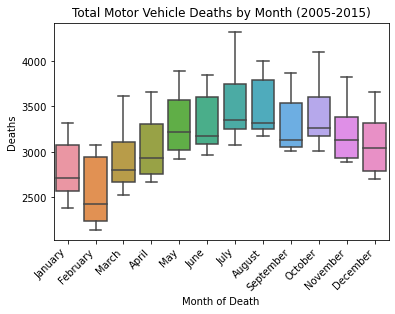

In [16]:
total_deaths_by_m_and_y = finalDf.groupby(['month_of_death', 'current_data_year']).size().reset_index(name='counts')
ax = sns.boxplot(x="month_of_death", y='counts', data=total_deaths_by_m_and_y)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set(xlabel='Month of Death', ylabel='Deaths')
ax.set_title("Total Motor Vehicle Deaths by Month (2005-2015)")

In [75]:
#Test for equality of variance with pingouin
#Levene's test for equal variance (acceptable for non-normal distributions)
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
levene_test = pg.homoscedasticity(total_deaths_by_m_and_y, dv='counts', group='month_of_death')
print(levene_test)

               W      pval  equal_var
levene  0.071586  0.999982       True


In [73]:
#One-way Anova with pingouin
total_deaths_by_m_and_y
aov = pg.anova(data=total_deaths_by_m_and_y, dv='counts', between='month_of_death', detailed=True)
print(aov)

           Source            SS   DF             MS        F         p-unc  \
0  month_of_death  1.077265e+07   11  979331.776171  7.66408  6.623694e-10   
1          Within  1.533385e+07  120  127782.042424      NaN           NaN   

        np2  
0  0.412643  
1       NaN  


In [20]:
#Tukey test

#http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html


In [21]:
#For all pairwise comparisons:
#http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html


[Text(0, 0.5, 'Deaths'), Text(0.5, 0, 'Day of Week of Death')]

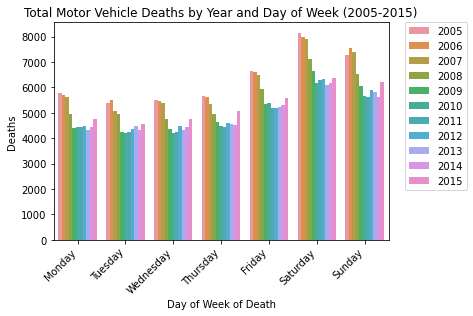

In [22]:
ax = sns.countplot(hue="current_data_year", x="day_of_week_of_death", data=finalDf)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
ax.set_title("Total Motor Vehicle Deaths by Year and Day of Week (2005-2015)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set(xlabel='Day of Week of Death', ylabel='Deaths')
#https://stackoverflow.com/questions/27019079/move-seaborn-plot-legend-to-a-different-position

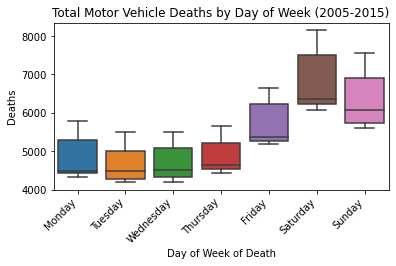

In [23]:
total_deaths_by_d_and_y = finalDf.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
#total_deaths_by_d_and_y
ax = sns.boxplot(x="day_of_week_of_death", y='counts', data=total_deaths_by_d_and_y)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title("Total Motor Vehicle Deaths by Day of Week (2005-2015)")
ax.set(xlabel='Day of Week of Death', ylabel='Deaths')
plt.subplots_adjust(bottom=0.3)
plt.savefig('Deaths_by_day_of_week.pdf')


In [77]:
#Test for equality of variance with pingouin
#Levene's test for equal variance (acceptable for non-normal distributions)
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
levene_test = pg.homoscedasticity(total_deaths_by_d_and_y, dv='counts', group='day_of_week_of_death')
print(levene_test)

               W      pval  equal_var
levene  0.471624  0.827143       True


In [79]:
#One-way Anova with pingouin
aov = pg.anova(data=total_deaths_by_d_and_y, dv='counts', between='day_of_week_of_death', detailed=True)
print(aov)

                 Source            SS  DF            MS          F  \
0  day_of_week_of_death  5.044759e+07   6  8.407932e+06  22.721244   
1                Within  2.590330e+07  70  3.700472e+05        NaN   

          p-unc       np2  
0  1.108777e-14  0.660733  
1           NaN       NaN  


In [24]:
dgroup1 = total_deaths_by_d_and_y[total_deaths_by_d_and_y["day_of_week_of_death"] == "Monday"]["counts"]
dgroup2 = total_deaths_by_d_and_y[total_deaths_by_d_and_y["day_of_week_of_death"] == "Tuesday"]["counts"]
dgroup3 = total_deaths_by_d_and_y[total_deaths_by_d_and_y["day_of_week_of_death"] == "Wednesday"]["counts"]
dgroup4 = total_deaths_by_d_and_y[total_deaths_by_d_and_y["day_of_week_of_death"] == "Thursday"]["counts"]
dgroup5 = total_deaths_by_d_and_y[total_deaths_by_d_and_y["day_of_week_of_death"] == "Friday"]["counts"]
dgroup6 = total_deaths_by_d_and_y[total_deaths_by_d_and_y["day_of_week_of_death"] == "Saturday"]["counts"]
dgroup7 = total_deaths_by_d_and_y[total_deaths_by_d_and_y["day_of_week_of_death"] == "Sunday"]["counts"]

In [25]:
#Levene's test for equal variance
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
stat, p = levene(dgroup1, dgroup2, dgroup3, dgroup4, dgroup5, dgroup6, dgroup7)
p

print(f'Levene test p-value {"{:.2e}".format(p)}')
if p<0.05:
    print(f'p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'p >= 0.05, sample variances similar enough for ANOVA')

Levene test p-value 8.27e-01
p >= 0.05, sample variances similar enough for ANOVA


In [26]:
#ANOVA

stats.f_oneway(dgroup1, dgroup2, dgroup3, dgroup4, dgroup5, dgroup6, dgroup7)

print("ANOVA")
print(F_onewayResult)
if F_onewayResult.pvalue < 0.05:
    print(f'p < 0.05, can reject the null hypothesis that the sample means are equal')
else:
    print(f'p >= 0.05, cannot reject the null hypothesis that the sample means are equal')

ANOVA
F_onewayResult(statistic=7.664079847146055, pvalue=6.623693934118219e-10)
p < 0.05, can reject the null hypothesis that the sample means are equal


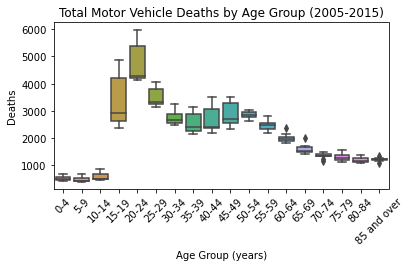

In [27]:
total_deaths_by_age_group_and_y = finalDf_with_census.groupby(['Age_group', 'current_data_year']).size().reset_index(name='counts')

ax = sns.boxplot(x="Age_group", y='counts', data=total_deaths_by_age_group_and_y)
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Total Motor Vehicle Deaths by Age Group (2005-2015)")
ax.set(xlabel='Age Group (years)', ylabel='Deaths')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 
           ['0-4', '5-9', '10-14','15-19','20-24','25-29','30-34','35-39','40-44',
            '45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85 and over'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
plt.subplots_adjust(bottom=0.3)
plt.savefig('Deaths_by_age_group.pdf')

In [80]:
#Test for equality of variance with pingouin
#Levene's test for equal variance (acceptable for non-normal distributions)
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
levene_test = pg.homoscedasticity(total_deaths_by_age_group_and_y, dv='counts', group='Age_group')
print(levene_test)

               W          pval  equal_var
levene  5.074917  5.789642e-09      False


In [86]:
#Kruskal-Wallis H-test: Are differences among groups significant?
#https://pingouin-stats.org/generated/pingouin.kruskal.html
Kruskal_Wallis_H_test = kruskal(data=total_deaths_by_age_group_and_y, dv='counts', between='Age_group')
print(Kruskal_Wallis_H_test)
#Low p value suggests can reject the null hypothesis that the population median of groups are equal.

            Source  ddof1           H         p-unc
Kruskal  Age_group     17  183.134562  6.844750e-30


In [31]:
#Can ANOVA test for differences among weekdays be run on age groups individually?

#Count deaths by age group, year, and day

total_deaths_by_age_group_y_and_day = finalDf_with_census.groupby(['Age_group', 'current_data_year', 'day_of_week_of_death']).size().reset_index(name='counts')
total_deaths_by_age_group_y_and_day

,Age_group,current_data_year,day_of_week_of_death,counts
0,1,2005,Monday,99
1,1,2005,Tuesday,78
2,1,2005,Wednesday,62
3,1,2005,Thursday,81
4,1,2005,Friday,107
...,...,...,...,...
1381,18,2015,Wednesday,179
1382,18,2015,Thursday,195
1383,18,2015,Friday,207
1384,18,2015,Saturday,190


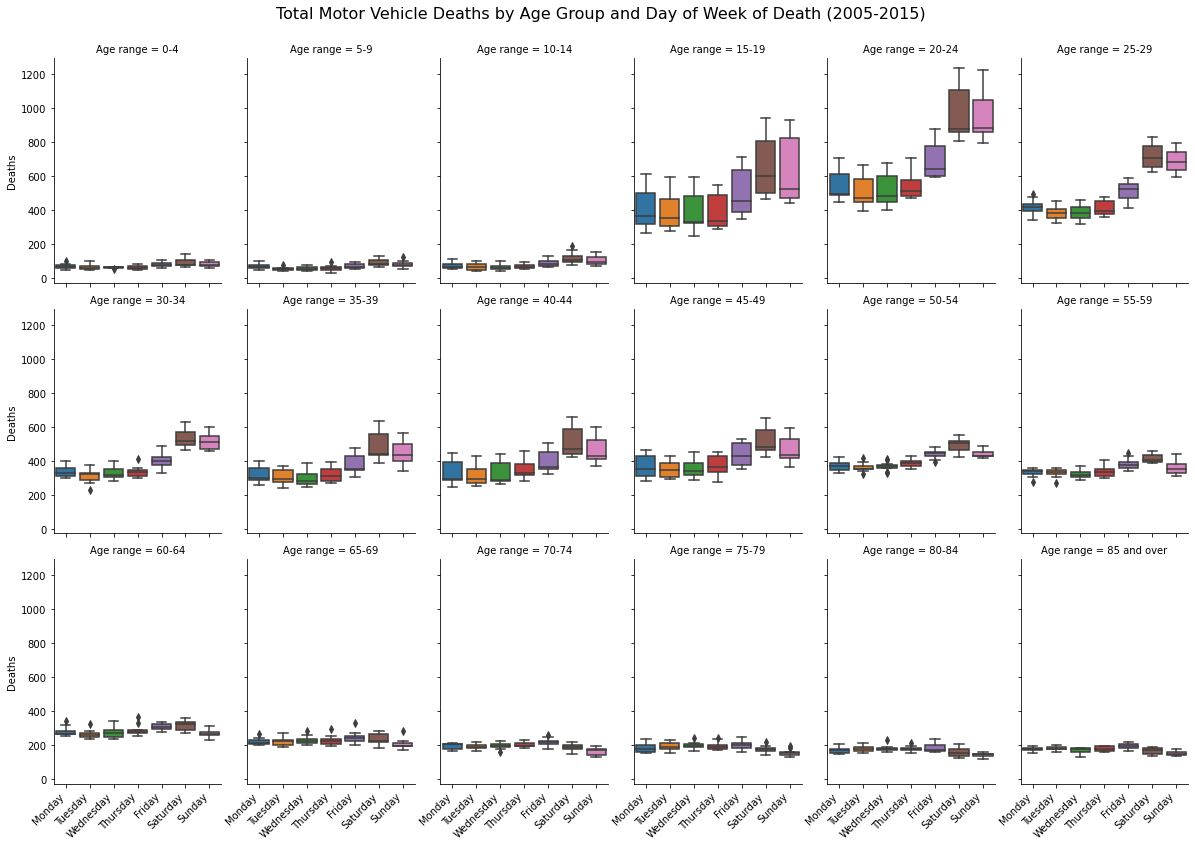

In [32]:
#Plot age groups individually
#Age_group = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
total_deaths_by_age_group_y_and_day['Age range'] = total_deaths_by_age_group_y_and_day['Age_group'].replace({1:'0-4', 2:'5-9', 3:'10-14', 4:'15-19', 5:'20-24', 6:'25-29', 7:'30-34', 8:'35-39', 9:'40-44',10:'45-49',11:'50-54', 12:'55-59' , 13:'60-64', 14:'65-69', 15:'70-74', 16:'75-79', 17:'80-84', 18:'85 and over'})

ax = sns.catplot(x="day_of_week_of_death", y="counts",
                col="Age range", col_wrap=6,
                data=total_deaths_by_age_group_y_and_day, kind="box",
                height=4, aspect=.7);
ax.set_axis_labels("", "Deaths")
ax.set_xticklabels(rotation=45, horizontalalignment='right')
plt.subplots_adjust(top=0.92, bottom=0.08)
ax.fig.suptitle('Total Motor Vehicle Deaths by Age Group and Day of Week of Death (2005-2015)', fontsize=16) 
plt.savefig('Deaths_by_age_group_and_day_of_week.pdf')
#https://stackoverflow.com/questions/43920341/python-seaborn-facetgrid-change-titles

In [92]:
#????
#Test for equality of variance with pingouin
#Levene's test for equal variance (acceptable for non-normal distributions)
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
levene_test_day = pg.homoscedasticity(total_deaths_by_age_group_y_and_day, dv='counts', group="day_of_week_of_death")
print(levene_test_day)
levene_test_age_range = pg.homoscedasticity(total_deaths_by_age_group_y_and_day, dv='counts', group="Age range")
print(levene_test_age_range)

                W          pval  equal_var
levene  36.625519  2.423317e-41      False
              W           pval  equal_var
levene  50.0018  2.888618e-130      False


In [87]:
#????
#Two-way ANOVA with pingouin
ANOVA_d_and_age_group = total_deaths_by_age_group_y_and_day.anova(dv="counts", between=["day_of_week_of_death", "Age range"]).round(3)
print(ANOVA_d_and_age_group)
#low p-values suggest significant effect of both variables, and significant interaction

                             Source            SS    DF           MS        F  \
0              day_of_week_of_death  2.802644e+06     6   467107.324  142.973   
1                         Age range  3.688197e+07    17  2169527.475  664.051   
2  day_of_week_of_death * Age range  4.307094e+06   102    42226.415   12.925   
3                          Residual  4.116561e+06  1260     3267.112      NaN   

   p-unc    np2  
0    0.0  0.405  
1    0.0  0.900  
2    0.0  0.511  
3    NaN    NaN  


In [95]:
total_deaths_by_age_group_y_and_day

,Age_group,current_data_year,day_of_week_of_death,counts,Age range
0,1,2005,Monday,99,0-4
1,1,2005,Tuesday,78,0-4
2,1,2005,Wednesday,62,0-4
3,1,2005,Thursday,81,0-4
4,1,2005,Friday,107,0-4
...,...,...,...,...,...
1381,18,2015,Wednesday,179,85 and over
1382,18,2015,Thursday,195,85 and over
1383,18,2015,Friday,207,85 and over
1384,18,2015,Saturday,190,85 and over


In [33]:
grouped_by_age_group = finalDf_with_census.groupby(finalDf_with_census.Age_group)

Age_group_1 = grouped_by_age_group.get_group(1)
Age_group_2 = grouped_by_age_group.get_group(2)
Age_group_3 = grouped_by_age_group.get_group(3)
Age_group_4 = grouped_by_age_group.get_group(4)
Age_group_5 = grouped_by_age_group.get_group(5)
Age_group_6 = grouped_by_age_group.get_group(6)
Age_group_7 = grouped_by_age_group.get_group(7)
Age_group_8 = grouped_by_age_group.get_group(8)
Age_group_9 = grouped_by_age_group.get_group(9)
Age_group_10 = grouped_by_age_group.get_group(10)
Age_group_11 = grouped_by_age_group.get_group(11)
Age_group_12 = grouped_by_age_group.get_group(12)
Age_group_13 = grouped_by_age_group.get_group(13)
Age_group_14 = grouped_by_age_group.get_group(14)
Age_group_15 = grouped_by_age_group.get_group(15)
Age_group_16 = grouped_by_age_group.get_group(16)
Age_group_17 = grouped_by_age_group.get_group(17)
Age_group_18 = grouped_by_age_group.get_group(18)

Age_group_1_df_by_y_and_day = Age_group_1.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_2_df_by_y_and_day = Age_group_2.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_3_df_by_y_and_day = Age_group_3.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_4_df_by_y_and_day = Age_group_4.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_5_df_by_y_and_day = Age_group_5.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_6_df_by_y_and_day = Age_group_6.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_7_df_by_y_and_day = Age_group_7.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_8_df_by_y_and_day = Age_group_8.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_9_df_by_y_and_day = Age_group_9.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_10_df_by_y_and_day = Age_group_10.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_11_df_by_y_and_day = Age_group_11.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_12_df_by_y_and_day = Age_group_12.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_13_df_by_y_and_day = Age_group_13.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_14_df_by_y_and_day = Age_group_14.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_15_df_by_y_and_day = Age_group_15.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_16_df_by_y_and_day = Age_group_16.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_17_df_by_y_and_day = Age_group_17.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_group_18_df_by_y_and_day = Age_group_18.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')


In [99]:
#Levene test for equal variance by day within age groups
levene_test_day_group_1 = levene_test_day_group_1 = pg.homoscedasticity(Age_group_1_df_by_y_and_day, dv='counts', group="day_of_week_of_death")
print(levene_test_day_group_1)
levene_test_day_group_2 = levene_test_day_group_1 = pg.homoscedasticity(Age_group_2_df_by_y_and_day, dv='counts', group="day_of_week_of_death")
print(levene_test_day_group_2)
levene_test_day_group_3 = levene_test_day_group_3 = pg.homoscedasticity(Age_group_3_df_by_y_and_day, dv='counts', group="day_of_week_of_death")
print(levene_test_day_group_3)
levene_test_day_group_4 = levene_test_day_group_4 = pg.homoscedasticity(Age_group_4_df_by_y_and_day, dv='counts', group="day_of_week_of_death")
print(levene_test_day_group_4)
levene_test_day_group_5 = levene_test_day_group_5 = pg.homoscedasticity(Age_group_5_df_by_y_and_day, dv='counts', group="day_of_week_of_death")
print(levene_test_day_group_5)
levene_test_day_group_6 = levene_test_day_group_6 = pg.homoscedasticity(Age_group_6_df_by_y_and_day, dv='counts', group="day_of_week_of_death")
print(levene_test_day_group_6)
levene_test_day_group_7 = levene_test_day_group_7 = pg.homoscedasticity(Age_group_7_df_by_y_and_day, dv='counts', group="day_of_week_of_death")
print(levene_test_day_group_7)
levene_test_day_group_8 = levene_test_day_group_8 = pg.homoscedasticity(Age_group_8_df_by_y_and_day, dv='counts', group="day_of_week_of_death")
print(levene_test_day_group_8)
levene_test_day_group_9 = levene_test_day_group_9 = pg.homoscedasticity(Age_group_9_df_by_y_and_day, dv='counts', group="day_of_week_of_death")
print(levene_test_day_group_9)
levene_test_day_group_10 = levene_test_day_group_10 = pg.homoscedasticity(Age_group_10_df_by_y_and_day, dv='counts', group="day_of_week_of_death")
print(levene_test_day_group_10)
levene_test_day_group_11 = levene_test_day_group_11 = pg.homoscedasticity(Age_group_11_df_by_y_and_day, dv='counts', group="day_of_week_of_death")
print(levene_test_day_group_11)
levene_test_day_group_12 = levene_test_day_group_12 = pg.homoscedasticity(Age_group_12_df_by_y_and_day, dv='counts', group="day_of_week_of_death")
print(levene_test_day_group_12)
levene_test_day_group_13 = levene_test_day_group_13 = pg.homoscedasticity(Age_group_13_df_by_y_and_day, dv='counts', group="day_of_week_of_death")
print(levene_test_day_group_13)
levene_test_day_group_14 = levene_test_day_group_14 = pg.homoscedasticity(Age_group_14_df_by_y_and_day, dv='counts', group="day_of_week_of_death")
print(levene_test_day_group_14)
levene_test_day_group_15 = levene_test_day_group_15 = pg.homoscedasticity(Age_group_15_df_by_y_and_day, dv='counts', group="day_of_week_of_death")
print(levene_test_day_group_15)
levene_test_day_group_16 = levene_test_day_group_16 = pg.homoscedasticity(Age_group_16_df_by_y_and_day, dv='counts', group="day_of_week_of_death")
print(levene_test_day_group_16)
levene_test_day_group_17 = levene_test_day_group_17 = pg.homoscedasticity(Age_group_17_df_by_y_and_day, dv='counts', group="day_of_week_of_death")
print(levene_test_day_group_17)
levene_test_day_group_18 = levene_test_day_group_18 = pg.homoscedasticity(Age_group_18_df_by_y_and_day, dv='counts', group="day_of_week_of_death")
print(levene_test_day_group_18)

#Yes, all variances are now equal, good to go with ANOVA

              W      pval  equal_var
levene  1.94635  0.085272       True
               W      pval  equal_var
levene  0.882933  0.512125       True
               W      pval  equal_var
levene  1.078084  0.384021       True
               W      pval  equal_var
levene  0.933086  0.476952       True
               W      pval  equal_var
levene  0.661903  0.680509       True
               W      pval  equal_var
levene  1.668938  0.141543       True
               W      pval  equal_var
levene  0.805239  0.569251       True
               W      pval  equal_var
levene  0.988245  0.440008       True
              W      pval  equal_var
levene  0.35972  0.901849       True
               W      pval  equal_var
levene  0.830179  0.550596       True
               W      pval  equal_var
levene  0.866909  0.523659       True
               W     pval  equal_var
levene  0.565013  0.75671       True
               W      pval  equal_var
levene  0.519195  0.791876       True
               W  

In [104]:
#One-way Anova with pingouin
aov_day_group_1 = pg.anova(data = Age_group_1_df_by_y_and_day, dv='counts', between="day_of_week_of_death", detailed=True)
print(aov_day_group_1)
aov_day_group_2 = pg.anova(data = Age_group_2_df_by_y_and_day, dv='counts', between="day_of_week_of_death", detailed=True)
print(aov_day_group_2)
aov_day_group_3 = pg.anova(data = Age_group_3_df_by_y_and_day, dv='counts', between="day_of_week_of_death", detailed=True)
print(aov_day_group_3)
aov_day_group_4 = pg.anova(data = Age_group_4_df_by_y_and_day, dv='counts', between="day_of_week_of_death", detailed=True)
print(aov_day_group_4)
aov_day_group_5 = pg.anova(data = Age_group_5_df_by_y_and_day, dv='counts', between="day_of_week_of_death", detailed=True)
print(aov_day_group_5)
aov_day_group_6 = pg.anova(data = Age_group_6_df_by_y_and_day, dv='counts', between="day_of_week_of_death", detailed=True)
print(aov_day_group_6)
aov_day_group_7 = pg.anova(data = Age_group_7_df_by_y_and_day, dv='counts', between="day_of_week_of_death", detailed=True)
print(aov_day_group_7)
aov_day_group_8 = pg.anova(data = Age_group_8_df_by_y_and_day, dv='counts', between="day_of_week_of_death", detailed=True)
print(aov_day_group_8)
aov_day_group_9 = pg.anova(data = Age_group_9_df_by_y_and_day, dv='counts', between="day_of_week_of_death", detailed=True)
print(aov_day_group_9)
aov_day_group_10 = pg.anova(data = Age_group_10_df_by_y_and_day, dv='counts', between="day_of_week_of_death", detailed=True)
print(aov_day_group_10)
aov_day_group_11 = pg.anova(data = Age_group_11_df_by_y_and_day, dv='counts', between="day_of_week_of_death", detailed=True)
print(aov_day_group_11)
aov_day_group_12 = pg.anova(data = Age_group_12_df_by_y_and_day, dv='counts', between="day_of_week_of_death", detailed=True)
print(aov_day_group_12)
aov_day_group_13 = pg.anova(data = Age_group_13_df_by_y_and_day, dv='counts', between="day_of_week_of_death", detailed=True)
print(aov_day_group_13)
aov_day_group_14 = pg.anova(data = Age_group_14_df_by_y_and_day, dv='counts', between="day_of_week_of_death", detailed=True)
print(aov_day_group_14)
aov_day_group_15 = pg.anova(data = Age_group_15_df_by_y_and_day, dv='counts', between="day_of_week_of_death", detailed=True)
print(aov_day_group_15)
aov_day_group_16 = pg.anova(data = Age_group_16_df_by_y_and_day, dv='counts', between="day_of_week_of_death", detailed=True)
print(aov_day_group_16)
aov_day_group_17 = pg.anova(data = Age_group_17_df_by_y_and_day, dv='counts', between="day_of_week_of_death", detailed=True)
print(aov_day_group_17)
aov_day_group_18 = pg.anova(data = Age_group_18_df_by_y_and_day, dv='counts', between="day_of_week_of_death", detailed=True)
print(aov_day_group_18)

#All age groups but 14 (65-69) show a significant effect of day of week

                 Source            SS  DF           MS         F     p-unc  \
0  day_of_week_of_death   8467.220779   6  1411.203463  6.038559  0.000039   
1                Within  16358.909091  70   233.698701       NaN       NaN   

        np2  
0  0.341061  
1       NaN  
                 Source            SS  DF           MS         F     p-unc  \
0  day_of_week_of_death  12777.766234   6  2129.627706  7.856673  0.000002   
1                Within  18974.181818  70   271.059740       NaN       NaN   

        np2  
0  0.402425  
1       NaN  
                 Source            SS  DF           MS         F  \
0  day_of_week_of_death  26902.493506   6  4483.748918  8.309354   
1                Within  37772.181818  70   539.602597       NaN   

          p-unc       np2  
0  8.331531e-07  0.415966  
1           NaN       NaN  
                 Source            SS  DF             MS         F     p-unc  \
0  day_of_week_of_death  9.099143e+05   6  151652.385281  7.143056  0.000006 

In [105]:
# FDR-corrected post hocs with Hedges'g effect size
#posthoc = pg.pairwise_ttests(data=df, dv='Scores', within='Time', subject='Subject',
#                             parametric=True, padjust='fdr_bh', effsize='hedges')

# Pretty printing of table
#pg.print_table(posthoc, floatfmt='.3f')

# FDR-corrected post hocs with Hedges'g effect size
posthoc = pg.pairwise_ttests(data=total_deaths_by_age_group_y_and_day, dv='counts', within='day_of_week_of_death', subject='Age_group',
                             parametric=True, padjust='fdr_bh', effsize='hedges')

# Pretty printing of table
pg.print_table(posthoc, floatfmt='.3f')


POST HOC TESTS

Contrast              A          B          Paired    Parametric          T      dof  Tail         p-unc    p-corr  p-adjust                                    BF10    hedges
--------------------  ---------  ---------  --------  ------------  -------  -------  ---------  -------  --------  ----------  ------------------------------------  --------
day_of_week_of_death  Monday     Tuesday    True      True            5.649  197.000  two-sided    0.000     0.000  fdr_bh                                172800.000     0.079
day_of_week_of_death  Monday     Wednesday  True      True            4.322  197.000  two-sided    0.000     0.000  fdr_bh                                   526.876     0.055
day_of_week_of_death  Monday     Thursday   True      True           -1.276  197.000  two-sided    0.204     0.204  fdr_bh                                     0.177    -0.016
day_of_week_of_death  Monday     Friday     True      True          -15.029  197.000  two-sided    0.000    

In [108]:
%%capture output
# FDR-corrected post hocs with Hedges'g effect size
posthoc = pg.pairwise_ttests(data=Age_group_1_df_by_y_and_day, dv='counts', within='day_of_week_of_death', subject='current_data_year',
                             parametric=True, padjust='fdr_bh', effsize='hedges')

# Pretty printing of table
pg.print_table(posthoc, floatfmt='.3f')


In [111]:
prev_cell_output = str(output)
output.show()


POST HOC TESTS

Contrast              A          B          Paired    Parametric         T     dof  Tail         p-unc    p-corr  p-adjust       BF10    hedges
--------------------  ---------  ---------  --------  ------------  ------  ------  ---------  -------  --------  ----------  -------  --------
day_of_week_of_death  Monday     Tuesday    True      True           1.020  10.000  two-sided    0.332     0.410  fdr_bh        0.457     0.256
day_of_week_of_death  Monday     Wednesday  True      True           1.281  10.000  two-sided    0.229     0.301  fdr_bh        0.575     0.523
day_of_week_of_death  Monday     Thursday   True      True           1.711  10.000  two-sided    0.118     0.165  fdr_bh        0.907     0.466
day_of_week_of_death  Monday     Friday     True      True          -4.776  10.000  two-sided    0.001     0.003  fdr_bh       51.552    -0.791
day_of_week_of_death  Monday     Saturday   True      True          -5.367  10.000  two-sided    0.000     0.001  fdr_b

In [106]:
# FDR-corrected post hocs with Hedges'g effect size
posthoc = pg.pairwise_ttests(data=total_deaths_by_age_group_y_and_day, dv='counts', within='Age_group', subject='day_of_week_of_death',
                             parametric=True, padjust='fdr_bh', effsize='hedges')

# Pretty printing of table
pg.print_table(posthoc, floatfmt='.3f')


POST HOC TESTS

Contrast      A    B  Paired    Parametric          T     dof  Tail         p-unc    p-corr  p-adjust                                                                       BF10    hedges
----------  ---  ---  --------  ------------  -------  ------  ---------  -------  --------  ----------  -----------------------------------------------------------------------  --------
Age_group     1    2  True      True            2.923  76.000  two-sided    0.005     0.005  fdr_bh                                                                        6.303     0.216
Age_group     1    3  True      True           -5.520  76.000  two-sided    0.000     0.000  fdr_bh                                                                    31470.000    -0.436
Age_group     1    4  True      True          -22.228  76.000  two-sided    0.000     0.000  fdr_bh                                         46500000000000000783897566642176.000    -3.248
Age_group     1    5  True      True          -2

In [ ]:
#Visual inspection suggests biggest difference between days may be Monday/Saturday, how does that look by age group?

In [ ]:
#Mon = ["Monday"]

#Sat = ["Saturday"]

#Age_group_1_Mon = Age_group_1_df_by_y_and_day[Age_group_1_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]

#Age_group_1_Sat = Age_group_1_df_by_y_and_day[Age_group_1_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]

In [36]:
finalDf_with_census

,month_of_death,sex,detail_age,day_of_week_of_death,current_data_year,manner_of_death,358_cause_recode,Age_group,Age,Both_sexes,Male,Female
0,January,M,76,Thursday,2010,Accident,397- Other and unspecified motor vehicle acci...,16,75 to 79 years,7319818.0,3186724.0,4133094.0
1,January,M,19,Friday,2010,Accident,396- Occupant of special-use motor vehicle in...,4,15 to 19 years,21981099.0,11277894.0,10703205.0
2,January,M,58,Sunday,2010,Accident,397- Other and unspecified motor vehicle acci...,12,55 to 59 years,19793660.0,9587000.0,10206660.0
3,February,M,43,Monday,2010,Accident,397- Other and unspecified motor vehicle acci...,9,40 to 44 years,20903209.0,10399313.0,10503896.0
4,January,M,55,Saturday,2010,Accident,397- Other and unspecified motor vehicle acci...,12,55 to 59 years,19793660.0,9587000.0,10206660.0
...,...,...,...,...,...,...,...,...,...,...,...,...
417980,December,M,11,Friday,2012,Accident,397- Other and unspecified motor vehicle acci...,3,10 to 14 years,20669745.0,10560199.0,10109546.0
417981,December,M,47,Saturday,2012,Accident,"393- Occupant of car, pickup truck or van inv...",10,45 to 49 years,21684685.0,10719863.0,10964822.0
417982,December,M,21,Saturday,2012,Accident,397- Other and unspecified motor vehicle acci...,5,20 to 24 years,22585960.0,11542727.0,11043233.0
417983,December,F,25,Sunday,2012,Accident,395- Occupant of motor vehicle involved in no...,6,25 to 29 years,21384448.0,10821489.0,10562959.0


In [37]:
#replace({1:'0-4', 2:'5-9', 3:'10-14', 4:'15-19', 5:'20-24', 6:'25-29', 7:'30-34', 8:'35-39', 9:'40-44',10:'45-49',11:'50-54', 12:'55-59' , 13:'60-64', 14:'65-69', 15:'70-74', 16:'75-79', 17:'80-84', 18:'85 and over'})

#ax = sns.catplot(x="day_of_week_of_death", y="counts",



#Age subgroups for a closer look

Age_cluster_1 = ['0-4', '5-9', '10-14']
Age_cluster_2 = [4, 5, 6]
Age_cluster_3 = [7, 8, 9]
Age_cluster_4 = [10, 11, 12]
Age_cluster_5 = [13, 14, 15]
Age_cluster_6 = [16, 17, 18]

Age_cluster_1_df = finalDf_with_census[finalDf_with_census["Age"]==('0-4','5-9','10-14')]
Age_cluster_2_df = finalDf_with_census[finalDf_with_census["Age_group"].isin(Age_cluster_2)]
Age_cluster_3_df = finalDf_with_census[finalDf_with_census["Age_group"].isin(Age_cluster_3)]
Age_cluster_4_df = finalDf_with_census[finalDf_with_census["Age_group"].isin(Age_cluster_4)]
Age_cluster_5_df = finalDf_with_census[finalDf_with_census["Age_group"].isin(Age_cluster_5)]
Age_cluster_6_df = finalDf_with_census[finalDf_with_census["Age_group"].isin(Age_cluster_6)]

#Age_group_1_df_by_y_and_day = Age_group_1.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
#Age_group_2_df_by_y_and_day = Age_group_2.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')

Age_cluster_1_df_by_y_and_day = Age_cluster_1.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_cluster_2_df_by_y_and_day = Age_cluster_2.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_cluster_3_df_by_y_and_day = Age_cluster_3.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_cluter_4_df_by_y_and_day = Age_cluster_4.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_cluster_5_df_by_y_and_day = Age_cluster_5.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')
Age_cluster_6_df_by_y_and_day = Age_cluster_6.groupby(['day_of_week_of_death', 'current_data_year']).size().reset_index(name='counts')

Age_cluster_1_Mon = Age_cluster_1_df_by_y_and_day[Age_cluster_1_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_cluster_1_Tue = Age_cluster_1_df_by_y_and_day[Age_cluster_1_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_cluster_1_Wed = Age_cluster_1_df_by_y_and_day[Age_cluster_1_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_cluster_1_Thu = Age_cluster_1_df_by_y_and_day[Age_cluster_1_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_cluster_1_Fri = Age_cluster_1_df_by_y_and_day[Age_cluster_1_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_cluster_1_Sat = Age_cluster_1_df_by_y_and_day[Age_cluster_1_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_cluster_1_Sun = Age_cluster_1_df_by_y_and_day[Age_cluster_1_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

Age_cluster_2_Mon = Age_cluster_2_df_by_y_and_day[Age_cluster_2_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_cluster_2_Tue = Age_cluster_2_df_by_y_and_day[Age_cluster_2_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_cluster_2_Wed = Age_cluster_2_df_by_y_and_day[Age_cluster_2_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_cluster_2_Thu = Age_cluster_2_df_by_y_and_day[Age_cluster_2_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_cluster_2_Fri = Age_cluster_2_df_by_y_and_day[Age_cluster_2_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_cluster_2_Sat = Age_cluster_2_df_by_y_and_day[Age_cluster_2_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_cluster_2_Sun = Age_cluster_2_df_by_y_and_day[Age_cluster_2_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

Age_cluster_3_Mon = Age_cluster_3_df_by_y_and_day[Age_cluster_3_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_cluster_3_Tue = Age_cluster_3_df_by_y_and_day[Age_cluster_3_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_cluster_3_Wed = Age_cluster_3_df_by_y_and_day[Age_cluster_3_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_cluster_3_Thu = Age_cluster_3_df_by_y_and_day[Age_cluster_3_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_cluster_3_Fri = Age_cluster_3_df_by_y_and_day[Age_cluster_3_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_cluster_3_Sat = Age_cluster_3_df_by_y_and_day[Age_cluster_3_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_cluster_3_Sun = Age_cluster_3_df_by_y_and_day[Age_cluster_3_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

Age_cluster_4_Mon = Age_cluster_4_df_by_y_and_day[Age_cluster_4_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_cluster_4_Tue = Age_cluster_4_df_by_y_and_day[Age_cluster_4_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_cluster_4_Wed = Age_cluster_4_df_by_y_and_day[Age_cluster_4_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_cluster_4_Thu = Age_cluster_4_df_by_y_and_day[Age_cluster_4_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_cluster_4_Fri = Age_cluster_4_df_by_y_and_day[Age_cluster_4_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_cluster_4_Sat = Age_cluster_4_df_by_y_and_day[Age_cluster_4_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_cluster_4_Sun = Age_cluster_4_df_by_y_and_day[Age_cluster_4_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

Age_cluster_5_Mon = Age_cluster_5_df_by_y_and_day[Age_cluster_5_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_cluster_5_Tue = Age_cluster_5_df_by_y_and_day[Age_cluster_5_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_cluster_5_Wed = Age_cluster_5_df_by_y_and_day[Age_cluster_5_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_cluster_5_Thu = Age_cluster_5_df_by_y_and_day[Age_cluster_5_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_cluster_5_Fri = Age_cluster_5_df_by_y_and_day[Age_cluster_5_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_cluster_5_Sat = Age_cluster_5_df_by_y_and_day[Age_cluster_5_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_cluster_5_Sun = Age_cluster_5_df_by_y_and_day[Age_cluster_5_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

Age_cluster_6_Mon = Age_cluster_6_df_by_y_and_day[Age_cluster_6_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_cluster_6_Tue = Age_cluster_6_df_by_y_and_day[Age_cluster_6_df_by_y_and_day['day_of_week_of_death'] == "Tuesday"]["counts"]
Age_cluster_6_Wed = Age_cluster_6_df_by_y_and_day[Age_cluster_6_df_by_y_and_day['day_of_week_of_death'] == "Wednesday"]["counts"]
Age_cluster_6_Thu = Age_cluster_6_df_by_y_and_day[Age_cluster_6_df_by_y_and_day['day_of_week_of_death'] == "Thursday"]["counts"]
Age_cluster_6_Fri = Age_cluster_6_df_by_y_and_day[Age_cluster_6_df_by_y_and_day['day_of_week_of_death'] == "Friday"]["counts"]
Age_cluster_6_Sat = Age_cluster_6_df_by_y_and_day[Age_cluster_6_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_cluster_6_Sun = Age_cluster_6_df_by_y_and_day[Age_cluster_6_df_by_y_and_day['day_of_week_of_death'] == "Sunday"]["counts"]

stat, p_acluster1 = levene(Age_cluster_1_Mon, Age_cluster_1_Tue, Age_cluster_1_Wed, Age_cluster_1_Thu, Age_cluster_1_Fri, Age_cluster_1_Sat, Age_cluster_1_Sun)
print(f'Age_group_1 Levene test p-value {p_acluster1}')
if p_acluster1<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
stat, p_acluster2 = levene(Age_cluster_2_Mon, Age_cluster_2_Tue, Age_cluster_2_Wed, Age_cluster_2_Thu, Age_cluster_2_Fri, Age_cluster_2_Sat, Age_cluster_2_Sun)
print(f'Age_group_2 Levene test p-value {p_acluster2}')
if p_acluster2<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
stat, p_acluster3 = levene(Age_cluster_3_Mon, Age_cluster_3_Tue, Age_cluster_3_Wed, Age_cluster_3_Thu, Age_cluster_3_Fri, Age_cluster_3_Sat, Age_cluster_3_Sun)
print(f'Age_group_3 Levene test p-value {p_acluster3}')
if p_acluster3<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
stat, p_acluster4 = levene(Age_cluster_4_Mon, Age_cluster_4_Tue, Age_cluster_4_Wed, Age_cluster_4_Thu, Age_cluster_4_Fri, Age_cluster_4_Sat, Age_cluster_4_Sun)
print(f'Age_group_4 Levene test p-value {p_acluster4}')
if p_acluster4<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
stat, p_acluster5 = levene(Age_cluster_5_Mon, Age_cluster_5_Tue, Age_cluster_5_Wed, Age_cluster_5_Thu, Age_cluster_5_Fri, Age_cluster_5_Sat, Age_cluster_5_Sun)
print(f'Age_group_5 Levene test p-value {p_acluster5}')
if p_acluster5<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
stat, p_acluster6 = levene(Age_cluster_6_Mon, Age_cluster_6_Tue, Age_cluster_6_Wed, Age_cluster_6_Thu, Age_cluster_6_Fri, Age_cluster_6_Sat, Age_cluster_6_Sun)
print(f'Age_group_6 Levene test p-value {p_acluster6}')
if p_acluster6<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')


AttributeError: 'list' object has no attribute 'groupby'

In [ ]:
#Perform Bartlett’s test for equal variances - allows different lengths according to some documentation, 
#but other documentation seems to disagree...
#Bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances. 
#For samples from significantly non-normal populations, Levene’s test levene is more robust.
#Parameters
#sample1, sample2,…array_like
#arrays of sample data. Only 1d arrays are accepted, they may have different lengths? But error message says not... at least
#some people in github seem to agree.... (shown here, commented out)

#MonTue = ["Monday", "Tuesday"]
#SatSun = ["Saturday", "Sunday"]

#agroup1_MonTue = agroup1_df_by_y_and_day[agroup1_df_by_y_and_day['day_of_week_of_death'] == MonTue]["counts"]
#agroup1_SatSun = agroup1_df_by_y_and_day[agroup1_df_by_y_and_day['day_of_week_of_death'] == SatSun]["counts"]

#agroup1_MonTue = agroup1_df_by_y_and_day[agroup1_df_by_y_and_day['day_of_week_of_death'] == ("Monday", "Tuesday")]["counts"]
#agroup1_SatSun = agroup1_df_by_y_and_day[agroup1_df_by_y_and_day['day_of_week_of_death'] == ("Saturday", "Sunday")]["counts"]



#stat, p_agroup1_MonTue_SatSun = bartlett(agroup1_MonTue, agroup1_SatSun)



#Okay, MondayTuesday vs. SatSun

#Levene's test for equal variance
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
#Apparently can't be done for groups of different lengths
#Mon = ["Monday"]
#Sat = ["Saturday"]

#Age_group_1_Mon = Age_group_1_df_by_y_and_day[Age_group_1_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
#Age_group_1_Sat = Age_group_1_df_by_y_and_day[Age_group_1_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
#Age_group_2_Mon = Age_group_2_df_by_y_and_day[Age_group_2_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
#Age_group_2_Sat = Age_group_2_df_by_y_and_day[Age_group_2_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
#Age_group_3_Mon = Age_group_3_df_by_y_and_day[Age_group_3_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
#Age_group_3_Sat = Age_group_3_df_by_y_and_day[Age_group_3_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
#Age_group_4_Mon = Age_group_4_df_by_y_and_day[Age_group_4_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
#Age_group_4_Sat = Age_group_4_df_by_y_and_day[Age_group_4_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
#Age_group_5_Mon = Age_group_5_df_by_y_and_day[Age_group_5_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
#Age_group_5_Sat = Age_group_5_df_by_y_and_day[Age_group_5_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
#Age_group_6_Mon = Age_group_6_df_by_y_and_day[Age_group_6_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
#Age_group_6_Sat = Age_group_6_df_by_y_and_day[Age_group_6_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
#Age_group_7_Mon = Age_group_7_df_by_y_and_day[Age_group_7_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
#Age_group_7_Sat = Age_group_7_df_by_y_and_day[Age_group_7_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
#Age_group_8_Mon = Age_group_8_df_by_y_and_day[Age_group_8_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
#Age_group_8_Sat = Age_group_8_df_by_y_and_day[Age_group_8_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
#Age_group_9_Mon = Age_group_9_df_by_y_and_day[Age_group_9_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
#Age_group_9_Sat = Age_group_9_df_by_y_and_day[Age_group_9_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
#Age_group_10_Mon = Age_group_10_df_by_y_and_day[Age_group_10_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
#Age_group_10_Sat = Age_group_10_df_by_y_and_day[Age_group_10_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
#Age_group_11_Mon = Age_group_11_df_by_y_and_day[Age_group_11_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_11_Sat = Age_group_11_df_by_y_and_day[Age_group_11_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_12_Mon = Age_group_12_df_by_y_and_day[Age_group_12_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_12_Sat = Age_group_12_df_by_y_and_day[Age_group_12_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_13_Mon = Age_group_13_df_by_y_and_day[Age_group_13_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_13_Sat = Age_group_13_df_by_y_and_day[Age_group_13_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_14_Mon = Age_group_14_df_by_y_and_day[Age_group_14_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_14_Sat = Age_group_14_df_by_y_and_day[Age_group_14_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_15_Mon = Age_group_15_df_by_y_and_day[Age_group_15_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_15_Sat = Age_group_15_df_by_y_and_day[Age_group_15_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_16_Mon = Age_group_16_df_by_y_and_day[Age_group_16_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_16_Sat = Age_group_16_df_by_y_and_day[Age_group_16_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_17_Mon = Age_group_17_df_by_y_and_day[Age_group_17_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_17_Sat = Age_group_17_df_by_y_and_day[Age_group_17_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]
Age_group_18_Mon = Age_group_18_df_by_y_and_day[Age_group_18_df_by_y_and_day['day_of_week_of_death'] == "Monday"]["counts"]
Age_group_18_Sat = Age_group_18_df_by_y_and_day[Age_group_18_df_by_y_and_day['day_of_week_of_death'] == "Saturday"]["counts"]


stat, p_agroup1_Mon_Sat = levene(Age_group_1_Mon, Age_group_1_Sat)
print(f'p_agroup1_Mon_Sat Levene test p-value {p_agroup1}')
if p_agroup1<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')

stat, p_agroup2_Mon_Sat = levene(Age_group_2_Mon, Age_group_2_Sat)
print(f'p_agroup2_Mon_Sat Levene test p-value {p_agroup2}')
if p_agroup2<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')

stat, p_agroup3_Mon_Sat = levene(Age_group_3_Mon, Age_group_3_Sat)
print(f'p_agroup3_Mon_Sat Levene test p-value {p_agroup3}')
if p_agroup3<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')

stat, p_agroup4_Mon_Sat = levene(Age_group_4_Mon, Age_group_4_Sat)
print(f'p_agroup4_Mon_Sat Levene test p-value {p_agroup4}')
if p_agroup4<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')

stat, p_agroup5_Mon_Sat = levene(Age_group_5_Mon, Age_group_5_Sat)
print(f'p_agroup5_Mon_Sat Levene test p-value {p_agroup5}')
if p_agroup5<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')

stat, p_agroup6_Mon_Sat = levene(Age_group_6_Mon, Age_group_6_Sat)
print(f'p_agroup6_Mon_Sat Levene test p-value {p_agroup6}')
if p_agroup6<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')

stat, p_agroup7_Mon_Sat = levene(Age_group_7_Mon, Age_group_7_Sat)
print(f'p_agroup7_Mon_Sat Levene test p-value {p_agroup7}')
if p_agroup7<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')

stat, p_agroup8_Mon_Sat = levene(Age_group_8_Mon, Age_group_8_Sat)
print(f'p_agroup8_Mon_Sat Levene test p-value {p_agroup8}')
if p_agroup8<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')

stat, p_agroup9_Mon_Sat = levene(Age_group_9_Mon, Age_group_9_Sat)
print(f'p_agroup9_Mon_Sat Levene test p-value {p_agroup9}')
if p_agroup9<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')
    
stat, p_agroup10_Mon_Sat = levene(Age_group_10_Mon, Age_group_10_Sat)
print(f'p_agroup10_Mon_Sat Levene test p-value {p_agroup10}')
if p_agroup10<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')    
    
stat, p_agroup11_Mon_Sat = levene(Age_group_11_Mon, Age_group_11_Sat)
print(f'p_agroup11_Mon_Sat Levene test p-value {p_agroup11}')
if p_agroup11<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')    
    
stat, p_agroup12_Mon_Sat = levene(Age_group_12_Mon, Age_group_12_Sat)
print(f'p_agroup12_Mon_Sat Levene test p-value {p_agroup12}')
if p_agroup12<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')    
    
stat, p_agroup13_Mon_Sat = levene(Age_group_13_Mon, Age_group_13_Sat)
print(f'p_agroup13_Mon_Sat Levene test p-value {p_agroup13}')
if p_agroup13<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')    
    
stat, p_agroup14_Mon_Sat = levene(Age_group_14_Mon, Age_group_14_Sat)
print(f'p_agroup14_Mon_Sat Levene test p-value {p_agroup14}')
if p_agroup14<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')    
    
stat, p_agroup15_Mon_Sat = levene(Age_group_15_Mon, Age_group_15_Sat)
print(f'p_agroup15_Mon_Sat Levene test p-value {p_agroup15}')
if p_agroup15<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')    
    
stat, p_agroup16_Mon_Sat = levene(Age_group_16_Mon, Age_group_16_Sat)
print(f'p_agroup16_Mon_Sat Levene test p-value {p_agroup16}')
if p_agroup16<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')    
    
stat, p_agroup17_Mon_Sat = levene(Age_group_17_Mon, Age_group_17_Sat)
print(f'p_agroup17_Mon_Sat Levene test p-value {p_agroup17}')
if p_agroup17<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')    
    
stat, p_agroup18_Mon_Sat = levene(Age_group_18_Mon, Age_group_18_Sat)
print(f'p_agroup18_Mon_Sat Levene test p-value {p_agroup18}')
if p_agroup18<0.05:
    print(f'   p < 0.05, sample variances too dissimilar for ANOVA')
else:
    print(f'   p >= 0.05, sample variances similar enough for ANOVA')    


In [ ]:
#order=['Sunday', 'Monday', 'Tuesday' ,'Wednesday','Thursday' ,'Friday', 'Saturday']
#cut_bins = [0,15,20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
#finalDf['cut_age'] = pd.cut(finalDf['detail_age'], bins=cut_bins) #labels=cut_labels_4)
#ax = sns.countplot(hue="day_of_week_of_death", x="Age_group", data=finalDf_with_census)
#ax.legend(bbox_to_anchor=(1, 1), loc=2,borderaxespad=0.)
#ax.set_title("Total Motor Vehicle Deaths by Age Group and Day of Week (2005-2015)",  y=1.05, fontsize=48)
#plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 
#           ['0-4', '5-9', '10-14','15-19','20-24','25-29','30-34','35-39','40-44',
#            '45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85 and over'])
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
#ax.set(xlabel='Age Group', ylabel='Deaths')
#fig = plt.gcf()
#fig.set_size_inches( 36, 12.5)
#sns.set(font_scale=4)
#plt.subplots_adjust(top=0.92)
#plt.savefig('Deaths_by_age_group_and_day_of_week_barplot.pdf')

In [38]:
total_deaths_by_Age_group_and_weekday = finalDf.groupby(['Age_group', 'day_of_week_of_death']).size().reset_index(name='total_deaths').dropna()
#total_deaths_by_Age_group_and_weekday.dtypes
total_deaths_by_Age_group_and_weekday

,Age_group,day_of_week_of_death,total_deaths
0,1,Monday,747
1,1,Tuesday,702
2,1,Wednesday,684
3,1,Thursday,681
4,1,Friday,877
...,...,...,...
121,18,Wednesday,1853
122,18,Thursday,1959
123,18,Friday,2127
124,18,Saturday,1824


In [39]:
anova = ols('detail_age ~ day_of_week_of_death', data=finalDf_with_census).fit()
table = sm.stats.anova_lm(anova, typ=2)
table

,sum_sq,df,F,PR(>F)
day_of_week_of_death,1.867691e+06,6.0,701.412054,0.0
Residual,1.854957e+08,417978.0,NaN,NaN


In [40]:
anova = ols('Age_group ~ day_of_week_of_death', data=finalDf_with_census).fit()
table = sm.stats.anova_lm(anova, typ=2)
table

,sum_sq,df,F,PR(>F)
day_of_week_of_death,7.397436e+04,6.0,699.847351,0.0
Residual,7.363428e+06,417978.0,NaN,NaN


In [ ]:
#paths = !type -a python
#for path in set(paths):
#    path = path.split()[-1]
#    print(path)
#    !{path} -c "import sys; print(sys.path)"
#    print()

[Text(0, 0.5, 'Deaths'), Text(0.5, 0, 'Age Group')]

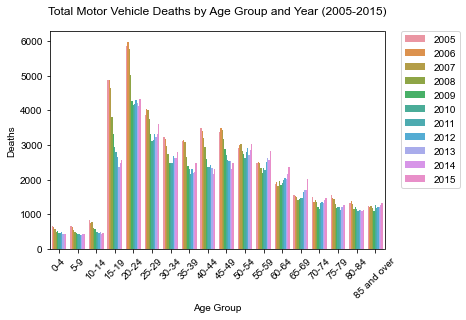

In [41]:
#order=['Sunday', 'Monday', 'Tuesday' ,'Wednesday','Thursday' ,'Friday', 'Saturday']
#cut_bins = [0,15,20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
#finalDf['cut_age'] = pd.cut(finalDf['detail_age'], bins=cut_bins) #labels=cut_labels_4)
ax = sns.countplot(hue="current_data_year", x="Age_group", data=finalDf)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
ax.set_title("Total Motor Vehicle Deaths by Age Group and Year (2005-2015)", y=1.05)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 
           ['0-4', '5-9', '10-14','15-19','20-24','25-29','30-34','35-39','40-44',
            '45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85 and over'])
sns.set(font_scale=1) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
ax.set(xlabel='Age Group', ylabel='Deaths')

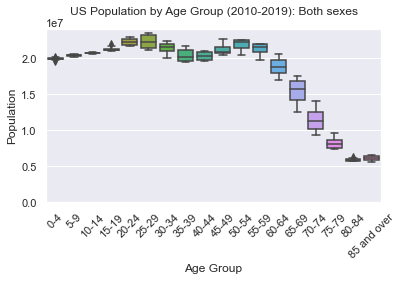

In [42]:
ax = sns.boxplot(x = 'Age_group', y = 'Both_sexes', data = census_summary_df)
ax.set_title("US Population by Age Group (2010-2019): Both sexes", y=1.05)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 
           ['0-4', '5-9', '10-14','15-19','20-24','25-29','30-34','35-39','40-44',
            '45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85 and over'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
ax.set(xlabel='Age Group', ylabel='Population')
ax.set(ylim=(0, 2.4e7))
plt.subplots_adjust(bottom=0.28)
sns.set(font_scale=1) 
plt.savefig('US_pop_by_age_group.pdf')

[(0.0, 12000000.0)]

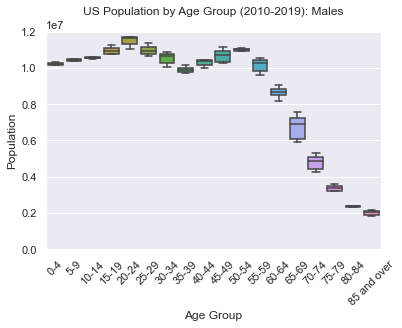

In [43]:
ax = sns.boxplot(x = 'Age_group', y = 'Male', data = finalDf_with_census)
ax.set_title("US Population by Age Group (2010-2019): Males", y=1.05)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 
           ['0-4', '5-9', '10-14','15-19','20-24','25-29','30-34','35-39','40-44',
            '45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85 and over'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
ax.set(xlabel='Age Group', ylabel='Population')
sns.set(font_scale=1) 
ax.set(ylim=(0, 1.2e7))

[(0.0, 12000000.0)]

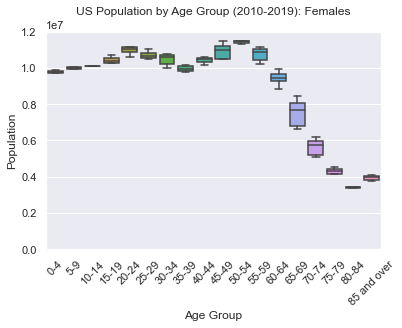

In [44]:
ax = sns.boxplot(x = 'Age_group', y = 'Female', data = finalDf_with_census)
ax.set_title("US Population by Age Group (2010-2019): Females",  y=1.05)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 
           ['0-4', '5-9', '10-14','15-19','20-24','25-29','30-34','35-39','40-44',
            '45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85 and over'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='center')
ax.set(xlabel='Age Group', ylabel='Population')
sns.set(font_scale=1) 
ax.set(ylim=(0, 1.2e7))

In [45]:
finalDf_with_census

,month_of_death,sex,detail_age,day_of_week_of_death,current_data_year,manner_of_death,358_cause_recode,Age_group,Age,Both_sexes,Male,Female
0,January,M,76,Thursday,2010,Accident,397- Other and unspecified motor vehicle acci...,16,75 to 79 years,7319818.0,3186724.0,4133094.0
1,January,M,19,Friday,2010,Accident,396- Occupant of special-use motor vehicle in...,4,15 to 19 years,21981099.0,11277894.0,10703205.0
2,January,M,58,Sunday,2010,Accident,397- Other and unspecified motor vehicle acci...,12,55 to 59 years,19793660.0,9587000.0,10206660.0
3,February,M,43,Monday,2010,Accident,397- Other and unspecified motor vehicle acci...,9,40 to 44 years,20903209.0,10399313.0,10503896.0
4,January,M,55,Saturday,2010,Accident,397- Other and unspecified motor vehicle acci...,12,55 to 59 years,19793660.0,9587000.0,10206660.0
...,...,...,...,...,...,...,...,...,...,...,...,...
417980,December,M,11,Friday,2012,Accident,397- Other and unspecified motor vehicle acci...,3,10 to 14 years,20669745.0,10560199.0,10109546.0
417981,December,M,47,Saturday,2012,Accident,"393- Occupant of car, pickup truck or van inv...",10,45 to 49 years,21684685.0,10719863.0,10964822.0
417982,December,M,21,Saturday,2012,Accident,397- Other and unspecified motor vehicle acci...,5,20 to 24 years,22585960.0,11542727.0,11043233.0
417983,December,F,25,Sunday,2012,Accident,395- Occupant of motor vehicle involved in no...,6,25 to 29 years,21384448.0,10821489.0,10562959.0


In [46]:
#Scatterplot of population vs. motor vehicle deaths, colored by age group
#https://stackoverflow.com/questions/17679089/pandas-dataframe-groupby-two-columns-and-get-counts
finalDf_with_census['COUNTER'] =1 
grouped = finalDf_with_census.groupby(['Age_group', 'current_data_year'])['COUNTER'].sum().reset_index(name ='total_accidents')
census_short_summary_df = pd.read_csv("nc-est2019-agesex_rearranged.csv")
census_short_summary_df.rename(columns={'Age group':'Age_group'}, inplace=True)
census_short_summary_df.rename(columns={'Year':'current_data_year'}, inplace=True)
census_short_summary_df.rename(columns={'Both sexes':'Both_sexes'}, inplace=True)
census_vs_total_accidents_df = pd.merge(grouped, census_short_summary_df)
census_vs_total_accidents_df

,Age_group,current_data_year,total_accidents,Age,Both_sexes,Male,Female
0,1,2010,463,Under 5 years,20188815,10312617,9876198
1,1,2011,451,Under 5 years,20123103,10279719,9843384
2,1,2012,478,Under 5 years,19976065,10204340,9771725
3,1,2013,432,Under 5 years,19849215,10141578,9707637
4,1,2014,424,Under 5 years,19872349,10159548,9712801
...,...,...,...,...,...,...,...
103,18,2011,1169,85 years and over,5697193,1882966,3814227
104,18,2012,1201,85 years and over,5864637,1962562,3902075
105,18,2013,1215,85 years and over,5992947,2028828,3964119
106,18,2014,1260,85 years and over,6132239,2099144,4033095


In [47]:
#Function for plotting linear regression :)

def plt_lin_reg(x_values, regress_values, line_eq, rvalue):
    plt.plot(x_values,regress_values,"k-")
    plt.text(0.2, 0.8, line_eq, fontsize=12, transform=plt.gcf().transFigure)
    r2 = (rvalue**2).round(decimals=2)
    r2_text = (f"r^2 = {r2}")
    plt.text(0.2, 0.75, r2_text, fontsize=12, transform=plt.gcf().transFigure)


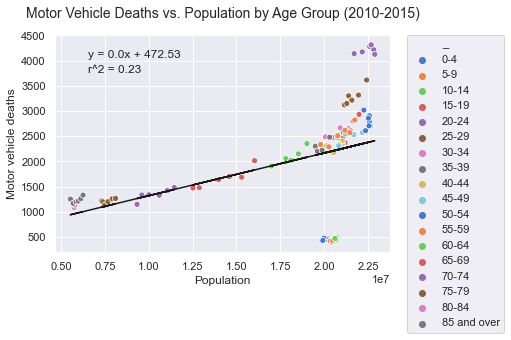

In [48]:
#Motor vehicle deaths vs. population size by age group

#sns.palplot(sns.color_palette("muted"))
ax = sns.scatterplot(x='Both_sexes', y='total_accidents', hue='Age_group', palette=("muted"), data=census_vs_total_accidents_df)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2,borderaxespad=0.)
new_labels = ['_', '0-4', '5-9', '10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85 and over']
for t, l in zip(ax.legend_.texts, new_labels): t.set_text(l)
ax.set(xlabel='Population', ylabel='Motor vehicle deaths')
ax.set_title('Motor Vehicle Deaths vs. Population by Age Group (2010-2015)', fontsize=14, y=1.05) 

#Calculate linear regression
y_values = census_vs_total_accidents_df['total_accidents']
x_values = census_vs_total_accidents_df['Both_sexes']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot and annotate linear regression
plt_lin_reg(x_values, regress_values, line_eq, rvalue)

#ax.set_size_inches( 36, 12.5)
#sns.set(font_scale=4)
#plt.subplots_adjust(top=0.8, bottom=0.3)

#Save plot
plt.savefig('Deaths vs. pop.pdf', bbox_inches='tight')
#savefig('samplefigure', bbox_inches='tight')